# Downloading Overlays

This notebook demonstrates how to download an FPGA overlay and examine programmable logic state.  

## 1. Instantiating an overlay
With the following overlay bundle present in the `overlays` folder, users can instantiate the overlay easily.

*  A bitstream file (\*.bit).
*  An hwh file (\*.hwh).
*  A python class (\*.py).

For example, an overlay called `base` can be loaded by:

In [1]:
from pynq.overlays.base import BaseOverlay

ol = BaseOverlay("base.bit")

The `BaseOverlay` class automatically downloads the bitstream, but it can re-downloaded by using the `download()` method.

In [2]:
ol.download()

Now we can check the download timestamp for this overlay.

In [3]:
ol.timestamp

'2022/10/6 14:16:52 +710996'

## 2. Examining the PL state

While there can be multiple overlay instances in Python, there is only one bitstream that is currently loaded onto the programmable logic (PL). 

This bitstream state is held in the singleton class, PL, and is available for user queries.

In [4]:
from pynq import PL

We can use this class to obtain the absolute path to the loaded bitstream and timestamp

In [5]:
PL.bitfile_name

'/usr/local/share/pynq-venv/lib/python3.10/site-packages/pynq/overlays/base/base.bit'

In [6]:
PL.timestamp

'2022/10/6 14:16:52 +710996'

Users can verify whether an overlay instance is currently loaded using the Overlay `is_loaded()` method

In [7]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

Finally, using Python, we can see the bitstream download time over 50 downloads.

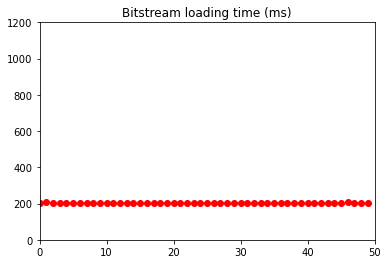

In [8]:
import time
import matplotlib.pyplot as plt
from pynq import Bitstream

length = 50
time_log = []
for i in range(length):
    start = time.time()
    ol.download()
    end = time.time()
    time_log.append((end-start)*1000)

%matplotlib inline
plt.plot(range(length), time_log, 'ro')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 1200])
plt.show()